# 차원 축소

In [1]:
import warnings
warnings.filterwarnings("ignore")

차원을 축소시키면
1. 일반적으로 훈련 속도만 빨라진다.
    - 정보를 유실하기 때문에 성능이 나빠지거나 
    - 잡음이나 불필요한 세부사항을 걸러내는 경우도 있기 때문에 성능이 좋아지기도.
    - 원래 데이터로 먼저 훈련해보는 것이 좋다.
2. 시각화에 유용하다.
    - 저차원의 그래프를 그리거나
    - 군집같은 시각적인 패턴을 발견할 수 있다.
    - 설명력을 높일 수도 있음.

## 차원의 저주

- 공간이 고차원일수록 임의의 두 점 사이의 평균거리가 길다.
- 즉, 고차원일 때 훨씬 많은 외삽extrapolation을 해야하므로 저차원일 때보다 예측이 불안정하다.
    - 외삽extrapolation : 특정한 두 점 바깥에 놓여있는 가능한 값을 구하는 것 
    - 보간intrapolation : 특정한 두 점 안쪽에 놓여있는 가능한 값을 구하는 것

차원의 저주 해결
1. 훈련 데이터 개수를 늘리는 것.
    - 그러나 차원이 늘어날수록 필요한 훈련 데이터 개수가 기하급수적으로 늘어남.
2. 차원 축소
    - 접근 방법 : 투영projection, 매니폴드
    - 알고리즘 : PCA, LLE 등

## 차원 축소를 위한 접근 방법

### 투영, Projection

공간의 훈련 샘플이 어떤 저차원 subspace에 놓여있을 수 있다. 이 subspace에 수직으로 투영하면 저차원 공간에 위치한 훈련 샘플을 얻을 수 있다. 

### 매니폴드 학습

d차원 매니폴드란, d차원 초평면처럼 보일 수 있는 n차원 공간의 일부. ex)스위스롤. d=2, n=3

매니폴드 가정 : 고차원 데이터셋이 저차원 매니폴드에 가깝게 놓여있다는 가정.                             
많은 차원 축소 알고리즘이 이 매니폴드 가정을 두고 매니폴드를 학습함.

그리고 매니폴드 가정과 함께 '데이터가 매니폴드 공간에 표현되면 분류, 회귀 등이 쉬워질 것'이라는 가정이 병행되곤 하는데,                            
항상 그렇지만은 않아서(결정경계가 더 복잡해 질 수 있음) 차원 축소는 반드시 성능을 높이거나 쉬운 결정경계를 만드는 것은 아니다.

## 주성분 분석(PCA; principal component analysis)

데이터에 가장 가까운 초평면을 정의 + 투영

### 분산이 최대가 되는 축 찾기
1. 데이터가 투영된 축의 분산이 최대가 되는 것이 정보 손실을 최소화할 수 있으므로 분산이 최대가 되는 축을 찾는다.
2. 첫번째 축에 직교하고 남은 분산을 최대한 보존하는 두 번째, 세 번째, ... n번째 축을 찾는다.
3. i번째 축의 중심이 (0,0)인 단위 벡터가 i번째 주성분이라고 한다.

In [4]:
import numpy as np

In [17]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)
X

array([[-1.01570027, -0.55091331, -0.26132626],
       [-0.00771675,  0.59958572,  0.03507755],
       [-0.95317135, -0.46453691, -0.24920288],
       [-0.92012304,  0.21009593,  0.02182381],
       [-0.76309739,  0.158261  ,  0.19152496],
       [ 1.11816122,  0.32508721,  0.31710572],
       [-1.02258878, -0.64384064, -0.13368695],
       [ 0.67351984, -0.27342519, -0.00787835],
       [ 1.01619558,  0.51546608,  0.46783297],
       [ 0.54957723,  0.67728016,  0.2340159 ],
       [-0.98960443,  0.00886617, -0.12152034],
       [ 1.13248106,  0.28229967,  0.06972972],
       [-0.99337712, -0.26832824, -0.15761101],
       [-0.94763679, -0.4995849 , -0.13927911],
       [ 1.10095709,  0.1706481 ,  0.09790432],
       [-0.34604591,  0.45334414,  0.06433843],
       [ 0.69102621, -0.27337761, -0.05926516],
       [ 0.68302902,  0.70421846,  0.24642318],
       [ 0.8774031 , -0.16775101, -0.02162333],
       [-1.06090127, -0.48213721, -0.38573526],
       [ 0.52336644,  0.66585845,  0.390

In [18]:
# 주성분 찾기 - 특잇값분해(SVD; singular value decomposition)
X_centered = X - X.mean(axis=0) #평균 0으로
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:,0] #주성분1
c2 = Vt.T[:,1] #주성분2
c1, c2

(array([0.93636116, 0.29854881, 0.18465208]),
 array([-0.34027485,  0.90119108,  0.2684542 ]))

### 투영하기
d차원으로 축소된 데이터셋 X_projected = X * d개의 주성분으로 이루어진 행렬 W_d

In [23]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)
X2D[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

In [28]:
#사이킷런으로 투영하기 - 마찬가지로 SVD 분해 사용, 자동으로 0에 데이터 평균을 맞춘다.
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) #사용할 주성분 개수
X2D_sklearn = pca.fit_transform(X)
X2D_sklearn[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [29]:
np.allclose(X2D, X2D_sklearn) #동일

True

In [25]:
# 주성분 행렬
pca.components_.T 

array([[-0.93636116,  0.34027485],
       [-0.29854881, -0.90119108],
       [-0.18465208, -0.2684542 ]])

In [26]:
#주성분 분산 비율
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

### 적절한 주성분 개수 선택하기

In [30]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [33]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_) #원소 누적합
d = np.argmax(cumsum >= 0.95) + 1
d

154

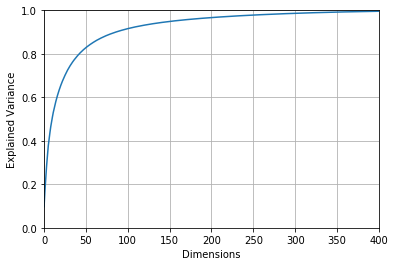

In [41]:
import matplotlib.pyplot as plt
plt.plot(cumsum)
plt.axis([0,400, 0,1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.grid()
plt.show()

In [34]:
#d를 지정하지 않고 보존 분산 비율을 지정할 수도 있음.
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [44]:
# 차원수 784 -> 154
X_train.shape, X_reduced.shape

((52500, 784), (52500, 154))

(52500, 784)

## 커널 PCA

## 지역 선형 임베딩 LLE; locally linear embedding

## 다른 차원 축소 기법